In [13]:
from sklearn.datasets import load_iris
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [14]:
import pandas as pd 
df = pd.DataFrame(iris.data, columns= iris.feature_names)
df['target'] = iris.target 
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [15]:
from sklearn.model_selection import train_test_split
x = df.drop(['target'], axis= 'columns')
y = df.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
knn.score(x_test, y_test)

0.9333333333333333

In [17]:
from sklearn.metrics import confusion_matrix
y_pre = knn.predict(x_test)

truth = y_test
prediction = y_pre

cm = confusion_matrix(truth, prediction)
cm

array([[11,  0,  0],
       [ 0,  6,  0],
       [ 0,  2, 11]], dtype=int64)

Text(42.0, 0.5, 'truth')

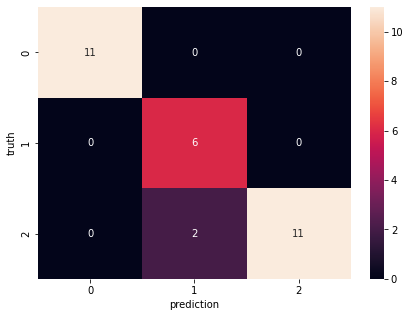

In [21]:
import matplotlib.pyplot as plt
import seaborn as sn

plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('prediction')
plt.ylabel('truth')

In [22]:
from sklearn.metrics import classification_report
print(classification_report(truth, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.75      1.00      0.86         6
           2       1.00      0.85      0.92        13

    accuracy                           0.93        30
   macro avg       0.92      0.95      0.92        30
weighted avg       0.95      0.93      0.94        30

